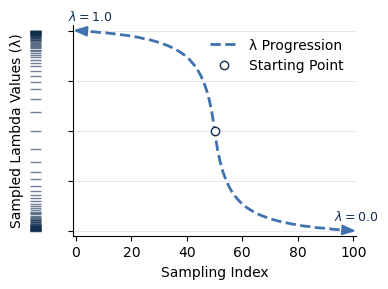

In [5]:
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lambda_values = [
    1.0,
    0.999,
    0.998,
    0.997,
    0.996,
    0.995,
    0.994,
    0.993,
    0.991,
    0.99,
    0.989,
    0.988,
    0.986,
    0.985,
    0.983,
    0.981,
    0.979,
    0.978,
    0.976,
    0.974,
    0.971,
    0.969,
    0.967,
    0.964,
    0.961,
    0.958,
    0.955,
    0.952,
    0.948,
    0.944,
    0.94,
    0.935,
    0.93,
    0.925,
    0.919,
    0.912,
    0.905,
    0.897,
    0.888,
    0.878,
    0.867,
    0.854,
    0.838,
    0.821,
    0.8,
    0.775,
    0.744,
    0.706,
    0.657,
    0.592,
    0.5,
    0.408,
    0.343,
    0.294,
    0.256,
    0.225,
    0.2,
    0.179,
    0.162,
    0.146,
    0.133,
    0.122,
    0.112,
    0.103,
    0.095,
    0.088,
    0.081,
    0.075,
    0.07,
    0.065,
    0.06,
    0.056,
    0.052,
    0.048,
    0.045,
    0.042,
    0.039,
    0.036,
    0.033,
    0.031,
    0.029,
    0.026,
    0.024,
    0.022,
    0.021,
    0.019,
    0.017,
    0.015,
    0.014,
    0.013,
    0.011,
    0.01,
    0.009,
    0.007,
    0.006,
    0.005,
    0.004,
    0.003,
    0.002,
    0.001,
    0.0,
]

df = pd.DataFrame(
    {
        "lambda_val": lambda_values,
        "idx": np.arange(len(lambda_values)),
    }
)

x_data = df["idx"].values
y_data = df["lambda_val"].values
N_points = len(x_data)

if N_points > 0:
    middle_index = (N_points - 1) // 2
    x_middle = x_data[middle_index]
    y_middle = y_data[middle_index]
else:
    middle_index = -1

fig, axs = plt.subplots(
    1,
    2,
    figsize=(4, 3),
    sharey=True,
    gridspec_kw={"width_ratios": [1, 12]},
)

# --- Plot 1: Rug Plot (Left Subplot - axs[0]) ---
ax_rug = axs[0]
sns.rugplot(y=y_data, ax=ax_rug, height=0.5, c="#112D4E", alpha=0.6, lw=0.8, zorder=1)

for spine in ax_rug.spines.values():
    spine.set_visible(False)

ax_rug.set_xticks([])
ax_rug.set_yticks([])
ax_rug.set_xlabel("")

# --- Plot 2: Main Plot (Right Subplot - axs[1]) ---
ax_main = axs[1]

ax_main.plot(
    x_data,
    y_data,
    linestyle="--",
    color="#3F72AF",
    linewidth=2,
    label="λ Progression",
    zorder=2,
)

if middle_index != -1:
    ax_main.plot(
        x_middle,
        y_middle,
        marker="o",
        markersize=6,
        color="white",
        linestyle="None",
        zorder=5,
        label="Starting Point",
        # make the border the same color as the line
        markeredgecolor="#112D4E",
        markeredgewidth=1,
    )

if N_points > 1:
    # Define arrow style (adjust head/tail width and length as needed)
    # Style similar to example, adjust numbers for visual appeal
    style = "Simple, tail_width=0.5, head_width=6, head_length=8"
    kw = dict(arrowstyle=style, color="#3F72AF", lw=1.5)  # Use slightly thinner lw for arrow than line?

    # Arrow near the start: From point 0 to point 1, curving slightly outwards
    # Positive rad curves counter-clockwise relative to the line from start to end
    arrow_start = patches.FancyArrowPatch(
        (x_data[1], y_data[1]),  # Starting position
        (x_data[0], y_data[0]),  # Ending position (where head points)
        connectionstyle="arc3,rad=0",  # Adjust rad for desired curve amount/direction
        **kw,  # Apply style, color, lw
    )
    ax_main.add_patch(arrow_start)  # Add the arrow patch to the axes

    # Arrow near the end: From point N-2 to point N-1, curving slightly outwards
    # Negative rad curves clockwise relative to the line from start to end
    arrow_end = patches.FancyArrowPatch(
        (x_data[-2], y_data[-2]),  # Starting position
        (x_data[-1], y_data[-1]),  # Ending position
        connectionstyle="arc3,rad=-0",  # Use opposite rad for similar outward curve
        **kw,  # Apply style, color, lw
    )
    ax_main.add_patch(arrow_end)  # Add the arrow patch to the axes

# add annotation on the arrows
ax_main.annotate(
    "$λ = 1.0$",
    xy=(x_data[0], y_data[0]),
    xytext=(x_data[0] - 3, y_data[0] + 0.05),
    fontsize=9,
    color="#112D4E",
)
ax_main.annotate(
    "$λ = 0.0$",
    xy=(x_data[-1], y_data[-1]),
    xytext=(x_data[-1] - 7, y_data[-1] + 0.05),
    fontsize=9,
    color="#112D4E",
)

ax_main.set_xlabel("Sampling Index")

x_padding = max(1, N_points * 0.01)
ax_main.set_xlim(x_data[0] - x_padding, x_data[-1] + x_padding)

ax_main.spines["top"].set_visible(False)
ax_main.spines["right"].set_visible(False)

y_min, y_max = df["lambda_val"].min(), df["lambda_val"].max()
padding_y = 0.025 * (y_max - y_min + 1e-6)
ax_main.set_ylim(y_min - padding_y, y_max + padding_y)  # Apply padding
ax_rug.set_ylim(y_min - padding_y, y_max + padding_y)  # Apply padding
ax_main.set_ylim(min(ax_main.get_ylim()[0], -0.025), max(ax_main.get_ylim()[1], 1.025))  # Ensure 0-1 visible

# add ticks to the plot
ax_main.set_yticks(np.arange(0, 1.1, 0.25))
ax_main.tick_params(axis="y", which="both", right=False, labelright=False, left=True, labelleft=False)
ax_rug.tick_params(axis="y", which="both", right=False, labelright=False, left=False, labelleft=False)
ax_rug.set_ylabel("Sampled Lambda Values (λ)")

ax_main.grid(
    which="both",
    axis="y",
    color="#112D4E",
    linestyle="solid",
    linewidth=0.5,
    alpha=0.15,
)
ax_main.legend(frameon=False)

plt.tight_layout()
plt.show()

fig.savefig(
    "lambda_progression_plot.svg",
    bbox_inches="tight",
    transparent=True,
)